In [2]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
gait = pd.read_csv("gaitFull.csv")

In [4]:
X = gait.drop('label',  axis=1)
y = gait['label']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [6]:
from sklearn.model_selection import GridSearchCV 
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [7]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 

In [8]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)
grid = GridSearchCV(knn, param_grid, refit = True, verbose = 3) 

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [9]:
grid.fit(X_train, y_train)

/Users/adithya/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.361, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.367, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.384, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.370, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.384, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.387, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ...........

[CV] ...................... n_neighbors=22, score=0.435, total=   0.0s
[CV] n_neighbors=22 ..................................................
[CV] ...................... n_neighbors=22, score=0.433, total=   0.0s
[CV] n_neighbors=22 ..................................................
[CV] ...................... n_neighbors=22, score=0.371, total=   0.0s
[CV] n_neighbors=23 ..................................................
[CV] ...................... n_neighbors=23, score=0.432, total=   0.0s
[CV] n_neighbors=23 ..................................................
[CV] ...................... n_neighbors=23, score=0.447, total=   0.0s
[CV] n_neighbors=23 ..................................................
[CV] ...................... n_neighbors=23, score=0.376, total=   0.0s
[CV] n_neighbors=24 ..................................................
[CV] ...................... n_neighbors=24, score=0.432, total=   0.0s
[CV] n_neighbors=24 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=7, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [10]:
knn_predictions=knn.predict(X_test)

In [11]:
print(classification_report(y_test, knn_predictions)) 

              precision    recall  f1-score   support

           0       0.27      0.50      0.35        50
           1       0.51      0.55      0.53        60
           2       0.47      0.43      0.45        70
           3       0.44      0.29      0.35        55
           4       0.69      0.61      0.65        77
           5       0.37      0.41      0.39        51
           6       0.52      0.50      0.51        68
           7       0.36      0.22      0.27        45

    accuracy                           0.45       476
   macro avg       0.45      0.44      0.44       476
weighted avg       0.47      0.45      0.45       476



In [18]:
gait = pd.read_csv("gaitFullModified2.csv")

In [19]:
X = gait.drop('label',  axis=1)
y = gait['label']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [21]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
knn_predictions=knn.predict(X_test)

In [22]:
print(classification_report(y_test, knn_predictions)) 

              precision    recall  f1-score   support

           1       0.40      0.46      0.43        61
           2       0.65      0.64      0.65       169
           3       0.67      0.48      0.56        71
           4       0.63      0.67      0.65       175

    accuracy                           0.61       476
   macro avg       0.59      0.56      0.57       476
weighted avg       0.61      0.61      0.61       476



In [23]:
print(confusion_matrix(y_test, knn_predictions))

[[ 28  13   0  20]
 [ 21 109  10  29]
 [  2  14  34  21]
 [ 19  32   7 117]]


In [24]:
d=confusion_matrix(y_test, knn_predictions)

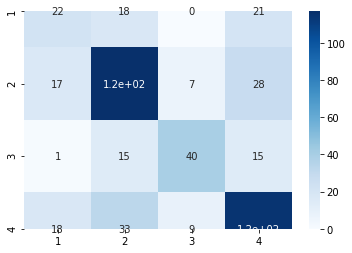

In [37]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(d, index = [i for i in "12345678"],
              columns = [i for i in "12345678"])
plt.figure()
sn.heatmap(df_cm, annot=True,cmap="Blues")

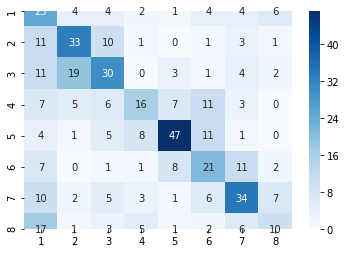

In [17]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(d, index = [i for i in "12345678"],
              columns = [i for i in "12345678"])
plt.figure()
sn.heatmap(df_cm, annot=True,cmap="Blues")

In [25]:
from sklearn.model_selection import GridSearchCV 
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [26]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)
grid = GridSearchCV(knn, param_grid, refit = True, verbose = 3) 

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [27]:
grid.fit(X_train, y_train)

/Users/adithya/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.540, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.573, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.552, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.529, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.564, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.541, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ...........

[CV] ...................... n_neighbors=24, score=0.611, total=   0.0s
[CV] n_neighbors=24 ..................................................
[CV] ...................... n_neighbors=24, score=0.633, total=   0.0s
[CV] n_neighbors=24 ..................................................
[CV] ...................... n_neighbors=24, score=0.628, total=   0.0s
[CV] n_neighbors=25 ..................................................
[CV] ...................... n_neighbors=25, score=0.608, total=   0.0s
[CV] n_neighbors=25 ..................................................
[CV] ...................... n_neighbors=25, score=0.629, total=   0.0s
[CV] n_neighbors=25 ..................................................
[CV] ...................... n_neighbors=25, score=0.636, total=   0.0s
[CV] n_neighbors=26 ..................................................
[CV] ...................... n_neighbors=26, score=0.600, total=   0.0s
[CV] n_neighbors=26 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=7, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [28]:
grid_predictions=grid.predict(X_test)

In [29]:
print(confusion_matrix(y_test, grid_predictions))

[[ 22  18   0  21]
 [ 17 117   7  28]
 [  1  15  40  15]
 [ 18  33   9 115]]


In [30]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           1       0.38      0.36      0.37        61
           2       0.64      0.69      0.66       169
           3       0.71      0.56      0.63        71
           4       0.64      0.66      0.65       175

    accuracy                           0.62       476
   macro avg       0.59      0.57      0.58       476
weighted avg       0.62      0.62      0.62       476



In [32]:
d=confusion_matrix(y_test, grid_predictions)

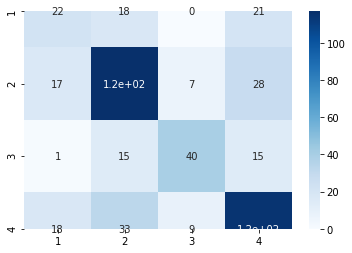

In [35]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(d, index = [i for i in "1234"],
              columns = [i for i in "1234"])
plt.figure()
sn.heatmap(df_cm, annot=True,cmap="Blues")